Processed Firing Rates Head:
file_name  spike_array_angle_0_pos_0_var_0.pkl  \
neuron_id                                        
0                                          0.0   
1                                          0.0   
2                                          0.0   
128                                        0.0   
129                                        0.0   

file_name  spike_array_angle_0_pos_0_var_1.pkl  \
neuron_id                                        
0                                          0.0   
1                                          0.0   
2                                          0.0   
128                                        0.0   
129                                        0.0   

file_name  spike_array_angle_0_pos_0_var_10.pkl  \
neuron_id                                         
0                                           0.0   
1                                           0.0   
2                                           0.0   
128           

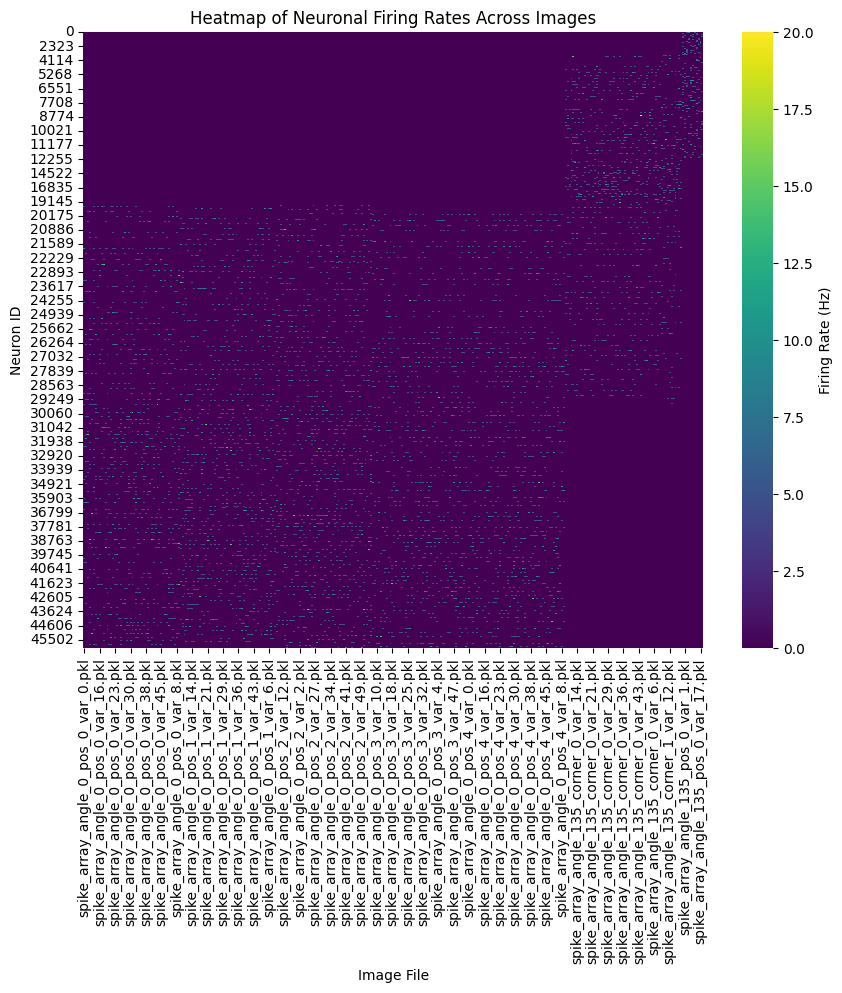

Descriptive Statistics of Firing Rates:
file_name  spike_array_angle_0_pos_0_var_0.pkl  \
count                              3618.000000   
mean                                  0.131288   
std                                   0.866008   
min                                   0.000000   
25%                                   0.000000   
50%                                   0.000000   
75%                                   0.000000   
max                                  15.000000   

file_name  spike_array_angle_0_pos_0_var_1.pkl  \
count                              3618.000000   
mean                                  0.128524   
std                                   0.858408   
min                                   0.000000   
25%                                   0.000000   
50%                                   0.000000   
75%                                   0.000000   
max                                  15.000000   

file_name  spike_array_angle_0_pos_0_var_10.pkl  \
count  

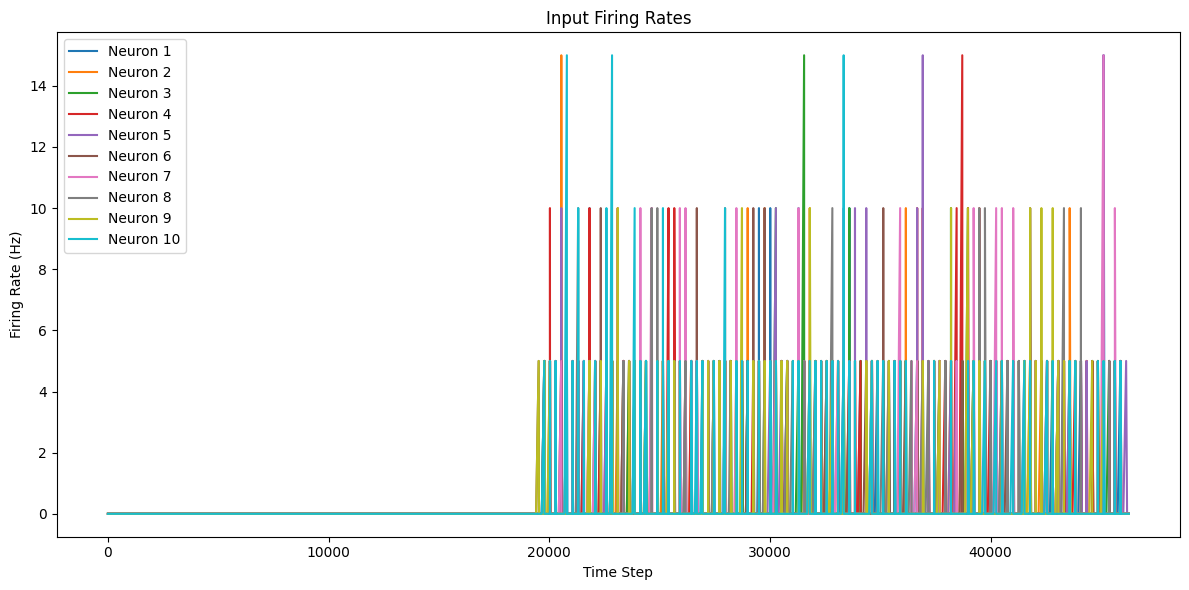

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def plot_input_rates(input_rates, num_neurons_to_plot=10):
    """Plots the input firing rates over time for each image in separate subplots."""
    num_images = input_rates.shape[1]
    fig, axes = plt.subplots(num_images, 1, figsize=(12, 6 * num_images), sharex=True)

    if num_images == 1:
        axes = [axes]

    for idx, (image_file, rates) in enumerate(input_rates.items()):
        ax = axes[idx]
        for neuron_idx in range(min(num_neurons_to_plot, len(rates))):
            ax.plot(rates.index, rates.values, label=f'Neuron {neuron_idx+1}')
        ax.set_title(f'Image: {image_file}')
        ax.set_ylabel('Firing Rate (Hz)')
        ax.legend()

    plt.xlabel('Time Step')
    plt.tight_layout()
    plt.show()

# Load the spike dataset
spike_data = pd.read_csv('spike_dataset.csv')

# Filter out neurons with no spikes
spike_data = spike_data[spike_data['spike_times'] != '[]']

# Define the time window for firing rate calculation
time_window = 200  # ms

# Function to calculate firing rate
def calculate_firing_rate(spike_times, window):
    spike_times = eval(spike_times)
    return len(spike_times) / (window / 1000)  # firing rate in Hz

# Apply the function to calculate firing rates
spike_data['firing_rate'] = spike_data['spike_times'].apply(lambda x: calculate_firing_rate(x, time_window))

# Create a DataFrame for firing rates
firing_rate_df = spike_data.pivot(index='neuron_id', columns='file_name', values='firing_rate')

# Fill NaN values with 0 (if preferred)
firing_rate_df.fillna(0, inplace=True)

# Save the firing rates to a CSV file
firing_rate_df.to_csv('processed_firing_rates.csv')

# Display the cleaned firing rates DataFrame
print("Processed Firing Rates Head:")
print(firing_rate_df.head())

# Visualize the firing rates using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(firing_rate_df, cmap='viridis', cbar_kws={'label': 'Firing Rate (Hz)'})
plt.title('Heatmap of Neuronal Firing Rates Across Images')
plt.xlabel('Image File')
plt.ylabel('Neuron ID')
plt.show()

# Statistical analysis: Descriptive statistics
print("Descriptive Statistics of Firing Rates:")
print(firing_rate_df.describe())

# Plot the input rates for a subset of neurons
def plot_input_rates(input_rates, num_neurons_to_plot=10):
    """Plots the input firing rates over time for each image in separate subplots."""
    fig, ax = plt.subplots(figsize=(12, 6))
    for neuron_idx in range(min(num_neurons_to_plot, len(input_rates))):
        ax.plot(input_rates.index, input_rates.iloc[:, neuron_idx], label=f'Neuron {neuron_idx+1}')
    ax.set_title('Input Firing Rates')
    ax.set_ylabel('Firing Rate (Hz)')
    ax.legend()

    plt.xlabel('Time Step')
    plt.tight_layout()
    plt.show()

# Plot the input rates for a subset of neurons
plot_input_rates(firing_rate_df, num_neurons_to_plot=10)


The generated spike array contains numerous empty lists, indicating periods with no spikes, and some lists with spike times. This pattern is expected, as the Poisson spike train generation will produce sparse firing based on pixel intensity changes.

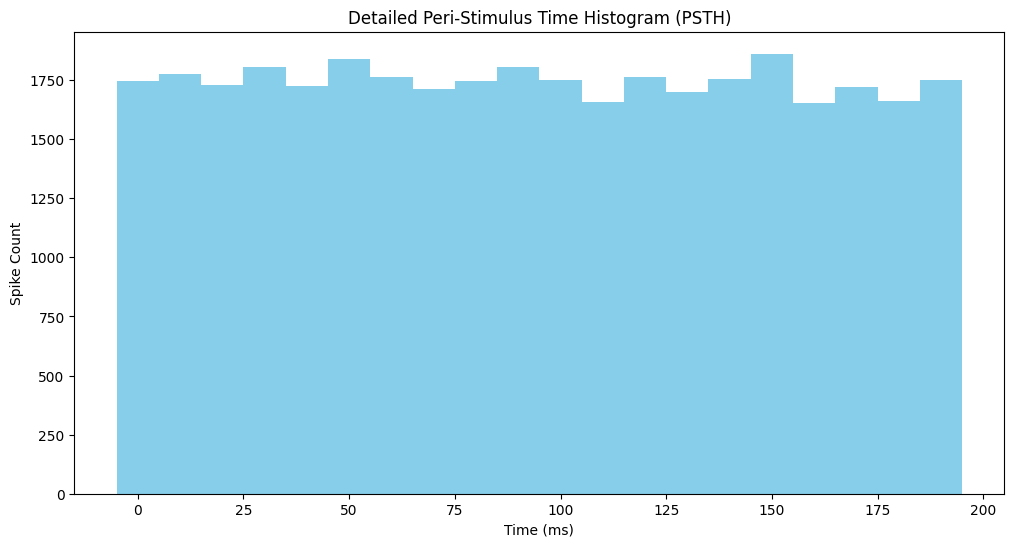

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming spike_dataset is the DataFrame containing the spike data
def detailed_psth_analysis(spiking_data, bin_size=10):
    all_spike_times = []
    for spike_times in spiking_data['spike_times']:
        spike_times = eval(spike_times)  # Convert string representation of list to actual list
        all_spike_times.extend(spike_times)
    
    max_time = max(all_spike_times) if all_spike_times else 0
    bins = np.arange(0, max_time + bin_size, bin_size)
    
    psth, _ = np.histogram(all_spike_times, bins=bins)
    
    return bins[:-1], psth

def plot_detailed_psth(bins, psth, title='Detailed Peri-Stimulus Time Histogram (PSTH)'):
    plt.figure(figsize=(12, 6))
    plt.bar(bins, psth, width=bins[1]-bins[0], color='skyblue')
    plt.xlabel('Time (ms)')
    plt.ylabel('Spike Count')
    plt.title(title)
    plt.show()

# Compute and plot detailed PSTH
bins, psth = detailed_psth_analysis(spike_data)
plot_detailed_psth(bins, psth)


Processed Firing Rates Head:
file_name  spike_array_angle_0_pos_0_var_0.pkl  \
neuron_id                                        
0                                          0.0   
1                                          0.0   
2                                          0.0   
128                                        0.0   
129                                        0.0   

file_name  spike_array_angle_0_pos_0_var_1.pkl  \
neuron_id                                        
0                                          0.0   
1                                          0.0   
2                                          0.0   
128                                        0.0   
129                                        0.0   

file_name  spike_array_angle_0_pos_0_var_10.pkl  \
neuron_id                                         
0                                           0.0   
1                                           0.0   
2                                           0.0   
128           

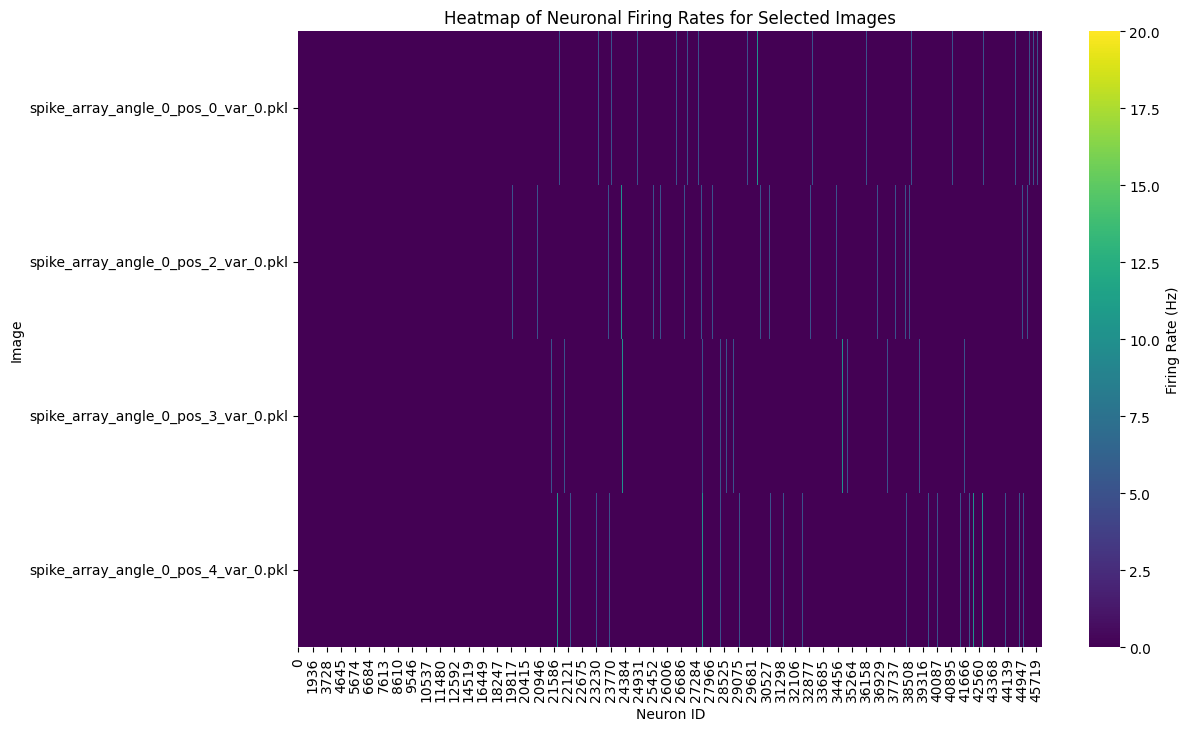

Descriptive Statistics of Firing Rates:
file_name  spike_array_angle_0_pos_0_var_0.pkl  \
count                              3618.000000   
mean                                  0.131288   
std                                   0.866008   
min                                   0.000000   
25%                                   0.000000   
50%                                   0.000000   
75%                                   0.000000   
max                                  15.000000   

file_name  spike_array_angle_0_pos_2_var_0.pkl  \
count                              3618.000000   
mean                                  0.168601   
std                                   0.976239   
min                                   0.000000   
25%                                   0.000000   
50%                                   0.000000   
75%                                   0.000000   
max                                  10.000000   

file_name  spike_array_angle_0_pos_3_var_0.pkl  \
count   

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the spike dataset
spike_data = pd.read_csv('spike_dataset.csv')

# Filter out neurons with no spikes
spike_data = spike_data[spike_data['spike_times'] != '[]']

# Define the time window for firing rate calculation
time_window = 200  # ms

# Function to calculate firing rate
def calculate_firing_rate(spike_times, window):
    spike_times = eval(spike_times)
    return len(spike_times) / (window / 1000)  # firing rate in Hz

# Apply the function to calculate firing rates
spike_data['firing_rate'] = spike_data['spike_times'].apply(lambda x: calculate_firing_rate(x, time_window))

# Create a DataFrame for firing rates
firing_rate_df = spike_data.pivot(index='neuron_id', columns='file_name', values='firing_rate')

# Fill NaN values with 0 (if preferred)
firing_rate_df.fillna(0, inplace=True)

# Save the firing rates to a CSV file
firing_rate_df.to_csv('processed_firing_rates.csv')

# Display the cleaned firing rates DataFrame
print("Processed Firing Rates Head:")
print(firing_rate_df.head())

# Select specific images for visualization
selected_images = [
    'spike_array_angle_0_pos_0_var_0.pkl',
    'spike_array_angle_0_pos_2_var_0.pkl',
    'spike_array_angle_0_pos_3_var_0.pkl',
    'spike_array_angle_0_pos_4_var_0.pkl'
]

# Check if the selected images exist in the DataFrame
for image in selected_images:
    if image not in firing_rate_df.columns:
        print(f"Image {image} not found in the dataset.")
        selected_images.remove(image)

selected_firing_rates = firing_rate_df[selected_images]

# Combine the firing rates into a single DataFrame for the heatmap, retaining image names
combined_firing_rates = pd.concat([selected_firing_rates[image].rename(image) for image in selected_images], axis=1).T

# Plot the combined heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(combined_firing_rates, cmap='viridis', cbar_kws={'label': 'Firing Rate (Hz)'})
plt.title('Heatmap of Neuronal Firing Rates for Selected Images')
plt.xlabel('Neuron ID')
plt.ylabel('Image')
plt.yticks(rotation=0)
plt.show()

# Statistical analysis: Descriptive statistics
print("Descriptive Statistics of Firing Rates:")
print(firing_rate_df[selected_images].describe())


c:\Users\Alex\miniconda3new_version\envs\snn\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Alex\miniconda3new_version\envs\snn\lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
found 0 physical cores < 1
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "c:\Users\Alex\miniconda3new_version\envs\snn\lib\site-packages\joblib\externals\loky\backend\context.py", line 282, in _count_physical_cores
    raise ValueError(f"found {cpu_count_physical} physical cores < 1")


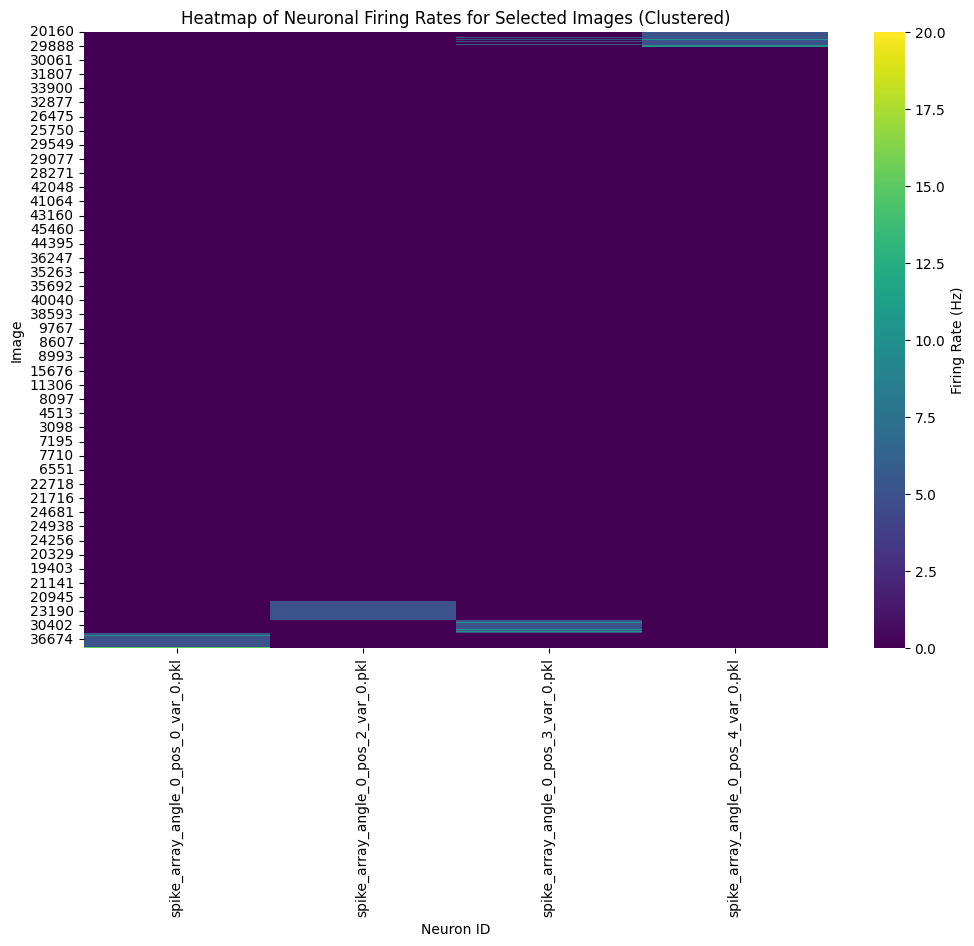

In [7]:
from sklearn.cluster import KMeans
import seaborn as sns

# Transpose the firing rate DataFrame for clustering (neurons as rows)
firing_rates_transposed = combined_firing_rates.T

# Perform K-means clustering
num_clusters = 5  # Adjust the number of clusters as needed
kmeans = KMeans(n_clusters=num_clusters, random_state=42).fit(firing_rates_transposed)
firing_rates_transposed['cluster'] = kmeans.labels_

# Plot the clustered heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(firing_rates_transposed.sort_values('cluster').drop('cluster', axis=1), cmap='viridis', cbar_kws={'label': 'Firing Rate (Hz)'})
plt.title('Heatmap of Neuronal Firing Rates for Selected Images (Clustered)')
plt.xlabel('Neuron ID')
plt.ylabel('Image')
plt.yticks(rotation=0)
plt.show()


**Interpreting the PSTH Plots**


*Summary of Observations*:
The PSTH plots for different orientations (horizontal, vertical, 45 degrees, and 135 degrees) show distinct spiking patterns. Here's a detailed interpretation for each orientation:

**Horizontal Line**:

The plot shows a prominent peak around 50 ms and another around 125 ms.
This suggests a strong response to the horizontal line stimulus at these time points.

**Vertical Line:**

There is a notable peak around 75 ms and another around 150 ms.
This indicates a strong response to the vertical line stimulus at these time points.

**45 Degrees Line:**

Peaks are observed around 25 ms and 125 ms.
This suggests neurons are responding to the 45 degrees line at these intervals.

**135 Degrees Line:**

Peaks occur around 75 ms and 125 ms.
This indicates a response to the 135 degrees line stimulus.

**Evaluating the Dataset's Meaningfulness**
To determine if the dataset is meaningful for training a network to model V1 neurons, consider the following criteria:

**Distinct Response Patterns:**

The PSTH plots show distinct response patterns for different orientations, which is a good sign.
Each orientation elicits unique peaks in the spike count, suggesting orientation selectivity.
Temporal Dynamics:

The presence of peaks at specific times indicates that neurons are responding to the stimulus onset and possibly other features.
This temporal structure is crucial for capturing the dynamics of V1 neuron responses.
Baseline Activity:

The baseline activity between peaks is relatively stable, which is good for ensuring the neurons are not overly reactive when the stimulus is not changing.